# Exercise 3 Part 1 - Multi Layer Perceptron 

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from perceptron import MultiLayerPerceptron
from optimizer import SGD_Optimizer, MomentumOptimizer, AdamOptimiser
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import defaultdict



## Hyperparameters

In [2]:
# Network architecture & activation
layer_sizes   = [2, 4, 1]
activations   = ['tanh', 'sigmoid']

# Optimizer settings
learning_rate = 0.1
batch_size    = 4             # full-batch for XOR
epochs        = 1000

# Verbosity / logging
verbose       = True
shuffle       = False
loss_kind     = 'cross_entropy'
runs_per_config = 5

## XOR test

### Prepare Data

In [3]:
X_xor = np.array([[-1,  1], [ 1, -1], [-1, -1], [ 1,  1]])
y_sign = np.array([ 1,  1, -1, -1])
y_xor = ((y_sign + 1) / 2).reshape(-1, 1)   # {0,1} labels


### Instansiate MLP and fit

In [4]:
xor_records = []
loss_histories = np.zeros((runs_per_config, epochs))
acc_histories  = np.zeros((runs_per_config, epochs))

for run in range(runs_per_config):
    np.random.seed(run)
    mlp = MultiLayerPerceptron(
        layer_sizes=[2,4,1],
        activations=['tanh','sigmoid'],
        optimizer=SGD_Optimizer(learning_rate),
        learning_rate=0.1,
        batch_size=batch_size,
        shuffle=False,
        loss_kind='cross_entropy',
        verbose=False
    )
    mlp.fit(X_xor, y_xor, epochs=epochs)
    xor_records.append({
        'Run': run+1,
        'Final Loss': mlp.losses[-1],
        'Final Accuracy': mlp.accuracies[-1]
    })
    loss_histories[run] = mlp.losses
    acc_histories[run]  = mlp.accuracies

### Metrics and Visualisation

### Table

In [5]:
df_xor = pd.DataFrame(xor_records)
mean_loss = loss_histories.mean(axis=0)
std_loss  = loss_histories.std(axis=0)
mean_acc  = acc_histories.mean(axis=0)
std_acc   = acc_histories.std(axis=0)
epochs_axis = np.arange(1, epochs+1)
df_xor

,Run,Final Loss,Final Accuracy
0,1,0.014376,1.0
1,2,0.021328,1.0
2,3,0.028103,1.0
3,4,0.038321,1.0
4,5,0.018901,1.0


#### Loss Curve

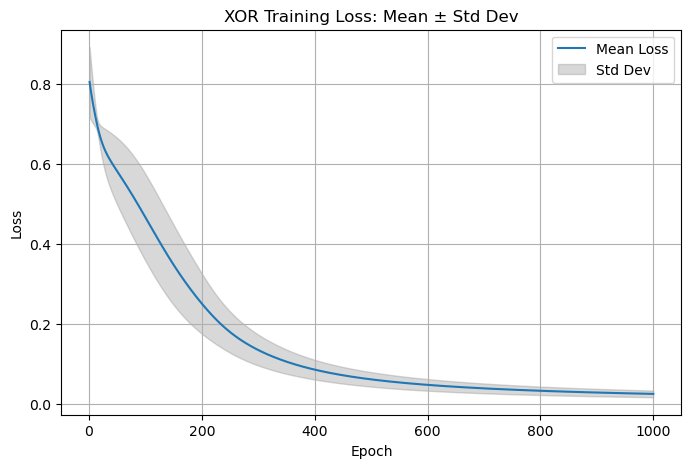

In [6]:
plt.figure(figsize=(8,5))
plt.plot(epochs_axis, mean_loss, label='Mean Loss')
plt.fill_between(
    epochs_axis,
    mean_loss - std_loss,
    mean_loss + std_loss,
    color='gray', alpha=0.3,
    label='Std Dev'
)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('XOR Training Loss: Mean ± Std Dev')
plt.legend()
plt.grid(True)
plt.show()


#### Accuracy Curve

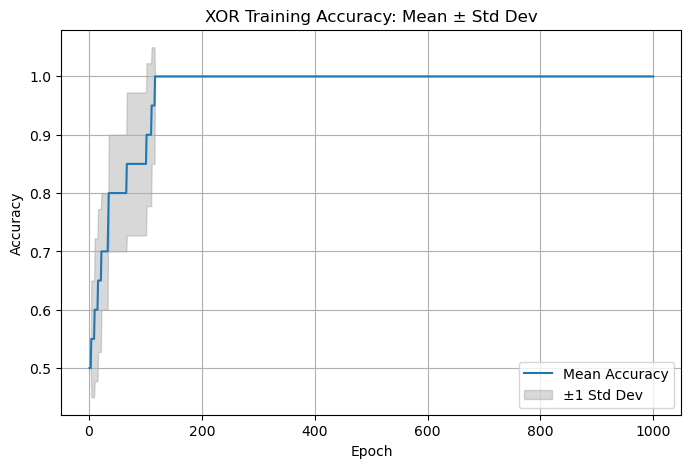

In [7]:
plt.figure(figsize=(8,5))
plt.plot(epochs_axis, mean_acc, label='Mean Accuracy')
plt.fill_between(
    epochs_axis,
    mean_acc - std_acc,
    mean_acc + std_acc,
    color='gray', alpha=0.3,
    label='±1 Std Dev'
)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('XOR Training Accuracy: Mean ± Std Dev')
plt.legend()
plt.grid(True)
plt.show()

#### Final Outputs

In [8]:
probs = mlp.predict_proba_batch(X_xor).flatten()
preds = mlp.predict(X_xor).flatten()
print("Raw outputs:", np.round(probs,3))
print("Pred     :", preds)
print("True     :", y_xor.flatten().astype(int))

Raw outputs: [0.979 0.981 0.018 0.016]
Pred     : [1 1 0 0]
True     : [1 1 0 0]


### Conclusion
The MLP can fit to XOR as can be seen from the predictions

## Testing Different Learning Rates

### Configuration

In [9]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
optimizers     = {'SGD': SGD_Optimizer, 'Momentum': MomentumOptimizer, 'Adam': AdamOptimiser}
epochs         = 1000
batch_size     = 4

### Sweep Loop

In [10]:
run_records = []
for opt_name, OptClass in optimizers.items():
    for lr in learning_rates:
        losses, accs = [], []
        for run in range(runs_per_config):
            np.random.seed(run)
            optimizer = OptClass(lr)
            mlp = MultiLayerPerceptron(
                layer_sizes=[2, 4, 1],
                activations=['tanh', 'sigmoid'],
                optimizer=OptClass(lr),
                learning_rate=lr,
                batch_size=batch_size,
                shuffle=False,
                loss_kind='cross_entropy',
                verbose=False
            )
            mlp.fit(X_xor, y_xor, epochs=epochs)
            losses.append(mlp.losses[-1])
            accs.append(mlp.accuracies[-1])
            run_records.append({
                'Optimizer':     opt_name,
                'Learning Rate': lr,
                'Run':           run+1,
                'Final Loss':    mlp.losses[-1],
                'Final Accuracy':mlp.accuracies[-1]
            })

### Results and Metrics

#### Table of all Runs

In [11]:
df_runs = pd.DataFrame(run_records)
df_runs

,Optimizer,Learning Rate,Run,Final Loss,Final Accuracy
0,SGD,0.001,1,0.716309,0.50
1,SGD,0.001,2,0.725234,0.50
2,SGD,0.001,3,0.789582,0.50
3,SGD,0.001,4,0.693948,0.75
4,SGD,0.001,5,0.711509,0.75
5,SGD,0.010,1,0.543482,0.75
6,SGD,0.010,2,0.306312,1.00
7,SGD,0.010,3,0.365241,1.00
8,SGD,0.010,4,0.585204,0.75
9,SGD,0.010,5,0.520017,0.75


#### Aggregate Table

In [12]:
agg = df_runs.groupby(['Optimizer','Learning Rate']).agg(
    Mean_Loss=('Final Loss','mean'),
    Std_Loss =('Final Loss','std'),
    Mean_Acc =('Final Accuracy','mean'),
    Std_Acc  =('Final Accuracy','std'),
).reset_index()

agg

,Optimizer,Learning Rate,Mean_Loss,Std_Loss,Mean_Acc,Std_Acc
0,Adam,0.001,0.182163,0.040270,1.00,0.000000
1,Adam,0.010,0.005747,0.001497,1.00,0.000000
2,Adam,0.100,0.000210,0.000049,1.00,0.000000
3,Adam,0.500,0.000048,0.000010,1.00,0.000000
4,Momentum,0.001,0.727955,0.037154,0.60,0.136931
5,Momentum,0.010,0.469327,0.121606,0.85,0.136931
6,Momentum,0.100,0.024405,0.009326,1.00,0.000000
7,Momentum,0.500,0.003947,0.001690,1.00,0.000000
8,SGD,0.001,0.727316,0.036626,0.60,0.136931
9,SGD,0.010,0.464051,0.121207,0.85,0.136931


#### Accuracy Plot

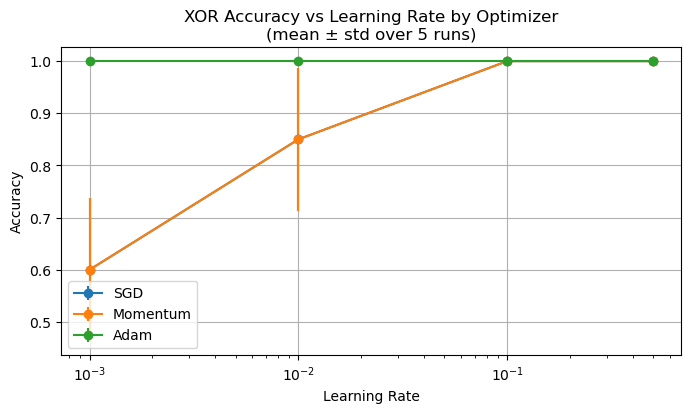

In [13]:
plt.figure(figsize=(8,4))
for opt_name in optimizers:
    subset = agg[agg['Optimizer']==opt_name]
    plt.errorbar(
        subset['Learning Rate'],
        subset['Mean_Acc'],
        yerr=subset['Std_Acc'],
        marker='o',
        label=opt_name
    )
plt.xscale('log'); plt.xlabel('Learning Rate'); plt.ylabel('Accuracy')
plt.title(f'XOR Accuracy vs Learning Rate by Optimizer\n(mean ± std over {runs_per_config} runs)')
plt.legend(); plt.grid(True); plt.show()

#### Loss Plot

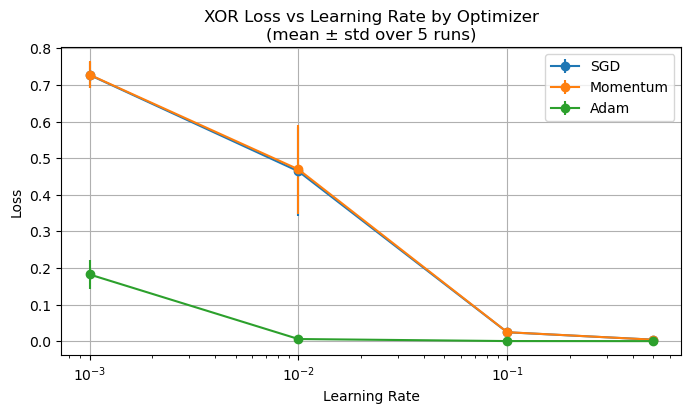

In [14]:
plt.figure(figsize=(8,4))
for opt_name in optimizers:
    subset = agg[agg['Optimizer']==opt_name]
    plt.errorbar(
        subset['Learning Rate'],
        subset['Mean_Loss'],
        yerr=subset['Std_Loss'],
        marker='o',
        label=opt_name
    )
plt.xscale('log'); plt.xlabel('Learning Rate'); plt.ylabel('Loss')
plt.title('XOR Loss vs Learning Rate by Optimizer\n(mean ± std over 5 runs)')
plt.legend(); plt.grid(True); plt.show()

## Testing Different Optimizers

### Gradient Descent

#### Metric Collection Loop

In [15]:
sgd_loss_curves = {}
sgd_acc_curves  = {}
sgd_raw_loss, sgd_raw_acc = {}, {}


for lr in learning_rates:
    L = np.zeros((runs_per_config, epochs))
    A = np.zeros((runs_per_config, epochs))
    for run in range(runs_per_config):
        np.random.seed(run)
        opt = SGD_Optimizer(lr)
        mlp = MultiLayerPerceptron(
            layer_sizes=[2,4,1],
            activations=['tanh','sigmoid'],
            optimizer=opt,
            learning_rate=lr,
            batch_size=batch_size,
            shuffle=False,
            loss_kind='cross_entropy',
            verbose=False
        )
        mlp.fit(X_xor, y_xor, epochs=epochs)
        L[run] = mlp.losses
        A[run] = mlp.accuracies


    sgd_raw_loss[f"lr={lr}"] = L
    sgd_raw_acc[f"lr={lr}"] = A

    sgd_loss_curves[f"lr={lr}"] = L.mean(axis=0)
    sgd_acc_curves [f"lr={lr}"] = A.mean(axis=0)

iters = np.arange(1, epochs+1)

sgd_loss_std = {label: runs.std(axis=0)
                  for label, runs in sgd_raw_loss.items()}
sgd_acc_std  = {label: runs.std(axis=0)
                  for label, runs in sgd_raw_acc.items()}

#### Accuracy Plot

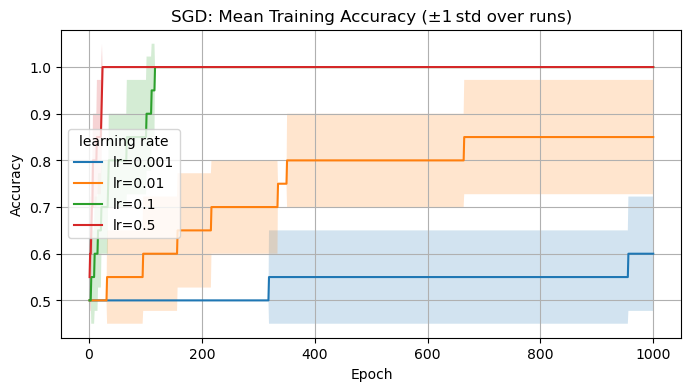

In [16]:
plt.figure(figsize=(8,4))
for label, mean_curve in sgd_acc_curves.items():
    std_curve = sgd_acc_std[label]
    plt.plot(iters, mean_curve, label=label)
    plt.fill_between(iters,
                     mean_curve - std_curve,
                     mean_curve + std_curve,
                     alpha=0.2)
plt.title("SGD: Mean Training Accuracy (±1 std over runs)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(title="learning rate")
plt.grid(True)
plt.show()

#### Loss Plot


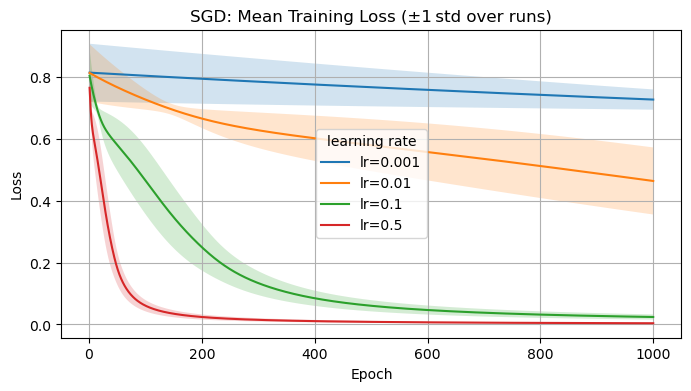

In [17]:
plt.figure(figsize=(8,4))
for label, mean_curve in sgd_loss_curves.items():
    std_curve = sgd_loss_std[label]
    plt.plot(iters, mean_curve, label=label)
    plt.fill_between(iters,
                     mean_curve - std_curve,
                     mean_curve + std_curve,
                     alpha=0.2)
plt.title("SGD: Mean Training Loss (±1 std over runs)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(title="learning rate")
plt.grid(True)
plt.show()

### Momentum

#### Sweep

In [18]:
mom_loss_curves = {}
mom_acc_curves  = {}
mom_raw_losses  = {}
mom_raw_accs    = {}

betas = [0.5, 0.9, 0.99]    # good idea to sweep these too!

for beta in betas:
    for lr in learning_rates:
        L = np.zeros((runs_per_config, epochs))
        A = np.zeros((runs_per_config, epochs))
        for run in range(runs_per_config):
            np.random.seed(run)
            # instantiate two momentum optimizers (weights + biases)
            opt = MomentumOptimizer(lr, beta=beta)

            mlp = MultiLayerPerceptron(
                layer_sizes=[2,4,1],
                activations=['tanh','sigmoid'],
                optimizer=opt,
                learning_rate=lr,
                batch_size=batch_size,
                shuffle=False,
                loss_kind='cross_entropy',
                verbose=False
            )
            mlp.fit(X_xor, y_xor, epochs=epochs)
            L[run] = mlp.losses
            A[run] = mlp.accuracies

        key = f"β={beta}, lr={lr}"
        # store raw histories
        mom_raw_losses[key] = L
        mom_raw_accs  [key] = A
        # compute mean curves
        mom_loss_curves[key] = L.mean(axis=0)
        mom_acc_curves [key] = A.mean(axis=0)

iters = np.arange(1, epochs+1)

# compute per‐epoch std‐dev
mom_loss_std = {k: v.std(axis=0) for k,v in mom_raw_losses.items()}
mom_acc_std  = {k: v.std(axis=0) for k,v in mom_raw_accs.items()}

#### Accuracy Plot

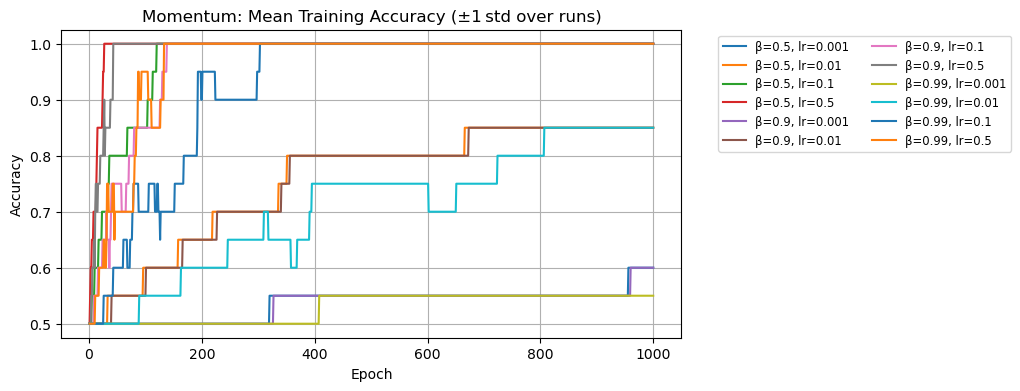

In [19]:
plt.figure(figsize=(8,4))
for label, mean_curve in mom_acc_curves.items():
    std_curve = mom_acc_std[label]
    plt.plot(iters, mean_curve, label=label)
    # plt.fill_between(iters,
    #                  mean_curve-std_curve,
    #                  mean_curve+std_curve,
    #                  alpha=0.2)
plt.title("Momentum: Mean Training Accuracy (±1 std over runs)")
plt.xlabel("Epoch"); plt.ylabel("Accuracy")
plt.legend(fontsize='small', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Loss Plot

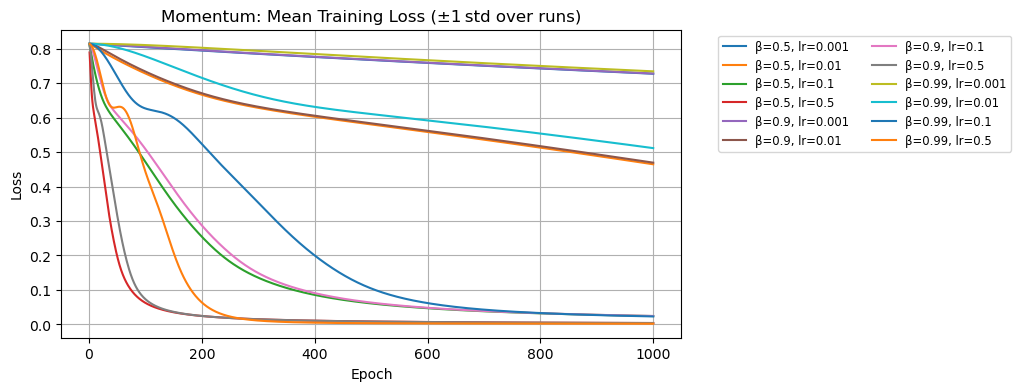

In [20]:
plt.figure(figsize=(8,4))
for label, mean_curve in mom_loss_curves.items():
    std_curve = mom_loss_std[label]
    plt.plot(iters, mean_curve, label=label)
    # plt.fill_between(iters,
    #                  mean_curve-std_curve,
    #                  mean_curve+std_curve,
    #                  alpha=0.2)
plt.title("Momentum: Mean Training Loss (±1 std over runs)")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.legend(fontsize='small', ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Adam

In [28]:
learning_rates = [0.001, 0.01, 0.1]
beta1_vals     = [0.9, 0.99]
beta2_vals     = [0.999, 0.9999]
epsilons       = [1e-8, 1e-6]

adam_raw_losses = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
adam_raw_accs   = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
adam_loss_curves = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
adam_acc_curves  = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
adam_loss_std    = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
adam_acc_std     = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

for lr in learning_rates:
    for b1 in beta1_vals:
        for b2 in beta2_vals:
            for eps in epsilons:
                L = np.zeros((runs_per_config, epochs))
                A = np.zeros((runs_per_config, epochs))
                for run in range(runs_per_config):
                    np.random.seed(run)
                    opt = AdamOptimiser(lr, beta1=b1, beta2=b2, epsilon=eps)
                    mlp = MultiLayerPerceptron(
                        layer_sizes   =[2,4,1],
                        activations   =['tanh','sigmoid'],
                        optimizer     =opt,
                        learning_rate =lr,
                        batch_size    =batch_size,
                        shuffle       =False,
                        loss_kind     ='cross_entropy',
                        verbose       =False
                    )
                    mlp.fit(X_xor, y_xor, epochs=epochs)
                    L[run] = mlp.losses
                    A[run] = mlp.accuracies

                adam_raw_losses[lr][b1][b2][eps] = L
                adam_raw_accs  [lr][b1][b2][eps] = A
                adam_loss_curves[lr][b1][b2][eps] = L.mean(axis=0)
                adam_acc_curves [lr][b1][b2][eps] = A.mean(axis=0)
                adam_loss_std   [lr][b1][b2][eps] = L.std(axis=0)
                adam_acc_std    [lr][b1][b2][eps] = A.std(axis=0)

iters = np.arange(1, epochs+1)

def plot_aggregates(agg_mean, agg_std, param_name, ylabel, title):
    plt.figure(figsize=(8,4))
    for key, mean_curve in agg_mean.items():
        std_curve = agg_std[key]
        plt.plot(iters, mean_curve, label=f"{param_name}={key}")
        plt.fill_between(iters,
                         mean_curve - std_curve,
                         mean_curve + std_curve,
                         alpha=0.2)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.legend(fontsize='small')
    plt.grid(True)
    plt.show()

def aggregate_and_plot(param_name, param_values):
    agg_loss, agg_std_loss = {}, {}
    agg_acc,  agg_std_acc  = {}, {}
    for v in param_values:
        loss_list, acc_list = [], []
        for lr in learning_rates:
            for b1 in beta1_vals:
                for b2 in beta2_vals:
                    for eps in epsilons:
                        if param_name=="lr"    and lr  != v: continue
                        if param_name=="beta1" and b1  != v: continue
                        if param_name=="beta2" and b2  != v: continue
                        if param_name=="eps"   and eps != v: continue
                        loss_list.append(adam_loss_curves[lr][b1][b2][eps])
                        acc_list. append(adam_acc_curves [lr][b1][b2][eps])
        L = np.stack(loss_list); A = np.stack(acc_list)
        agg_loss[v]     = L.mean(axis=0)
        agg_std_loss[v] = L.std (axis=0)
        agg_acc [v]     = A.mean(axis=0)
        agg_std_acc[v]  = A.std (axis=0)

    plot_aggregates(agg_loss,    agg_std_loss,
                    param_name, "Loss",
                    f"Adam Loss aggregated over others per {param_name}")
    plot_aggregates(agg_acc,     agg_std_acc,
                    param_name, "Accuracy",
                    f"Adam Accuracy aggregated over others per {param_name}")

#### Aggregate Per Learning Rate:

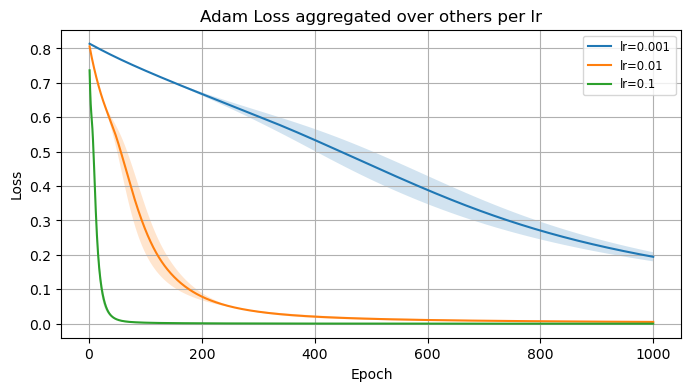

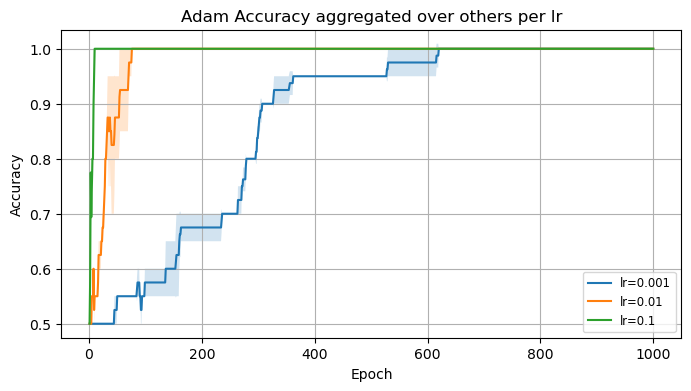

In [29]:
aggregate_and_plot("lr", learning_rates)

#### Aggregate Per Beta1

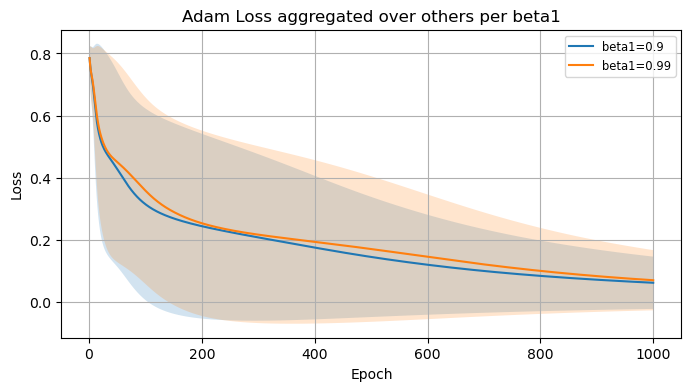

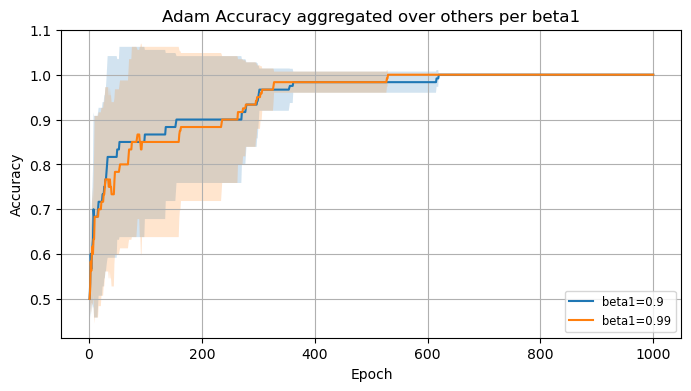

In [30]:
aggregate_and_plot("beta1",  beta1_vals)

#### Aggregate per Beta2

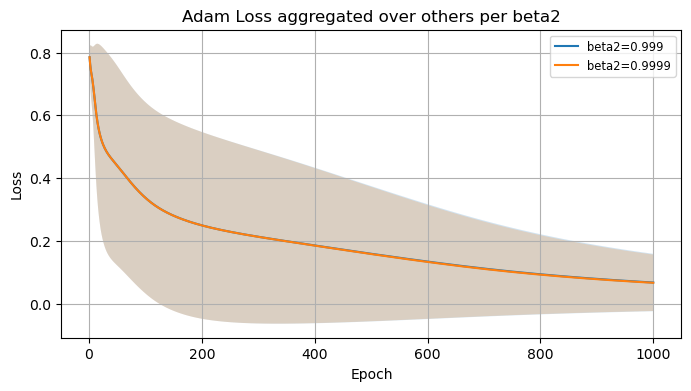

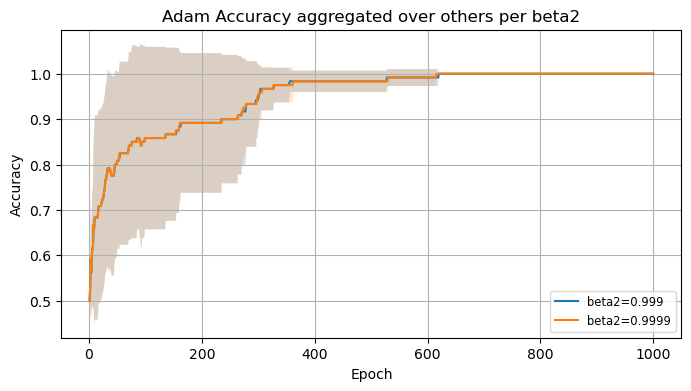

In [31]:
aggregate_and_plot("beta2",  beta2_vals)

#### Aggregate per Epsilon

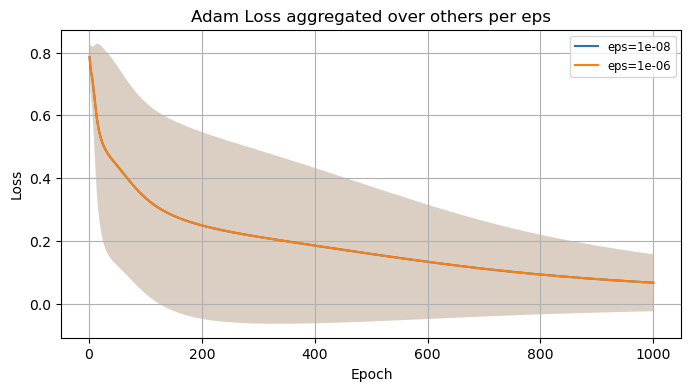

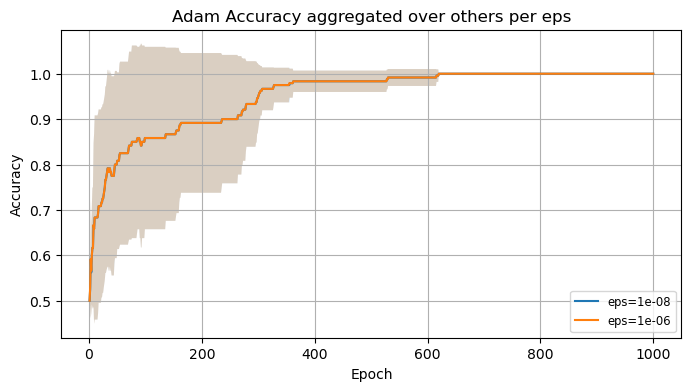

In [32]:
aggregate_and_plot("eps",    epsilons)